**<p style = "text-align: center">TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐẠI HỌC QUỐC GIA TPHCM</p>**

# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> KHÁM PHÁ, THỐNG KÊ CỦA TOP CÁC CA KHÚC TRÊN SPOTIFY</p>
<p style = "text-align: center"> Sinh viên thực hiện </p>

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120127 | Trần Minh Tuấn Kiệt |
| 20120136 | Huỳnh Tuấn Nam |
| 20120158 | Trần Hoàng Anh Phi |

---

# **Import các thư viện**

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# **Thông tin về dữ liệu**<br>
Dữ liệu được sử dụng trong bài được lấy từ trang: <a href = "https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv"> https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv</a><br>
Dataset chứa các ca khúc nằm trong TOP 200 ca khúc hay nhất trong 1 tuần của mỗi quốc gia từ 2021/02/04 ~ 2022/07/14

Theo như file "README.md":
> This directory contains codes that I used to create the dataset: https://www.kaggle.com/datasets/yelexa/spotify200<br><br>To create the dataset, I downloaded the csv files from the 'Weekly Top Songs' charts on Spotify Charts for each country from the week of 2021/02/04 ~ 2022/07/14. For the 'Global' charts, there is data from the week of 2016/12/29 ~ 2022/07/14. I used concat.py to create one combined file for each country, then used data.py to collect additional data for each song from the Spotify API.<br><br>The dataset was aggregated into an interactive dashboard, where you can explore artists and music trends around the world: https://public.tableau.com/app/profile/yejielee/viz/TheModernARExperienceWhichGlobalArtistWillYouSign/ar_dashboard?publish=yes

Đọc dữ liệu từ file csv

In [10]:
spotify_df = pd.read_csv("./features/processed.csv")

***

# **Đưa ra các câu hỏi cần trả lời:**
1. Dựa vào các đặc trưng về âm thanh của một bài hát, hãy thử dự đoán thể loại nhạc của bài hát đó.
2. 


### **Trả lời câu hỏi 1**:
- Đầu tiên, ta vẽ biểu đồ heatmap để xác định hệ số tương quan giữa các biến.
- Vì có quá nhiều thể loại nhạc, gây khó khăn cho việc phân lớp, nên ta chỉ trích xuất ra những thể loại có tần xuất xuất hiện lớn và thực hiện mô hình.
- Chuẩn hoá các giá trị cho phù hợp với đầu vào của mô hình.
- Thử nghiệm các mô hình.
- Đánh giá kết quả.

**Lấy ra những "thằng" artist_genre có số lượng lớn hơn `10000`**

In [11]:
# spotify_df.groupby('artist_genre').filter(lambda x: x['artist_genre'].count() > 10000)['artist_genre'].value_counts()
df = spotify_df[spotify_df.groupby('artist_genre')['artist_genre'].transform('count')>7000].copy() # Viết vậy để lấy dc cái số value count.
df['artist_genre'].value_counts()

pop                     125702
trap latino              42656
latin                    38454
reggaeton                36275
dance pop                34766
0                        28796
uk pop                   19249
rap                      18180
k-pop                    16274
canadian pop             14710
reggaeton colombiano     10558
latin pop                 9878
hip hop                   9511
australian hip hop        8790
pop dance                 8365
modern rock               8173
pop rap                   7898
german hip hop            7731
edm                       7309
russian hip hop           7060
tropical house            7029
Name: artist_genre, dtype: int64

<font color=red>*Kể từ đây, ta chỉ dùng sub-dataframe: df để tiếp tục tính cho câu 1*</font>

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # điền các giá trị thiếu
import numpy as np

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

le = LabelEncoder()
le.fit(df['artist_genre'])
df['categorical_label'] = le.transform(df['artist_genre']) # transform label to numbers

In [13]:
df['categorical_label'].value_counts()

11    125702
18     42656
8      38454
15     36275
3      34766
0      28796
20     19249
14     18180
7      16274
2      14710
16     10558
9       9878
6       9511
1       8790
12      8365
10      8173
13      7898
5       7731
4       7309
17      7060
19      7029
Name: categorical_label, dtype: int64

In [14]:
le.inverse_transform(df['categorical_label']) # transform label back to original

array(['pop', 'latin', 'latin', ..., '0', 'dance pop', 'pop'],
      dtype=object)

**Trực quan hoá dữ liệu**

Tìm sự tương quan giữa các cột cường độ âm thanh.

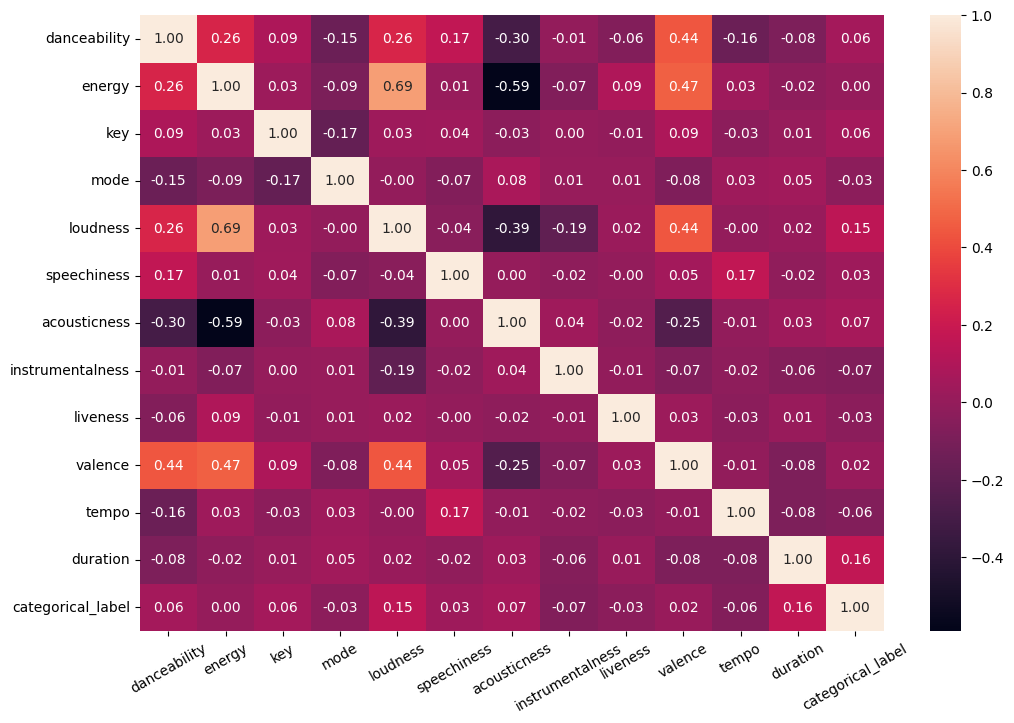

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

audio_cols = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']
plt.figure(figsize=(12,8))
sns.heatmap(df[audio_cols+['categorical_label']].corr(), annot=True, fmt='.2f')
plt.xticks(rotation=30)
plt.show()

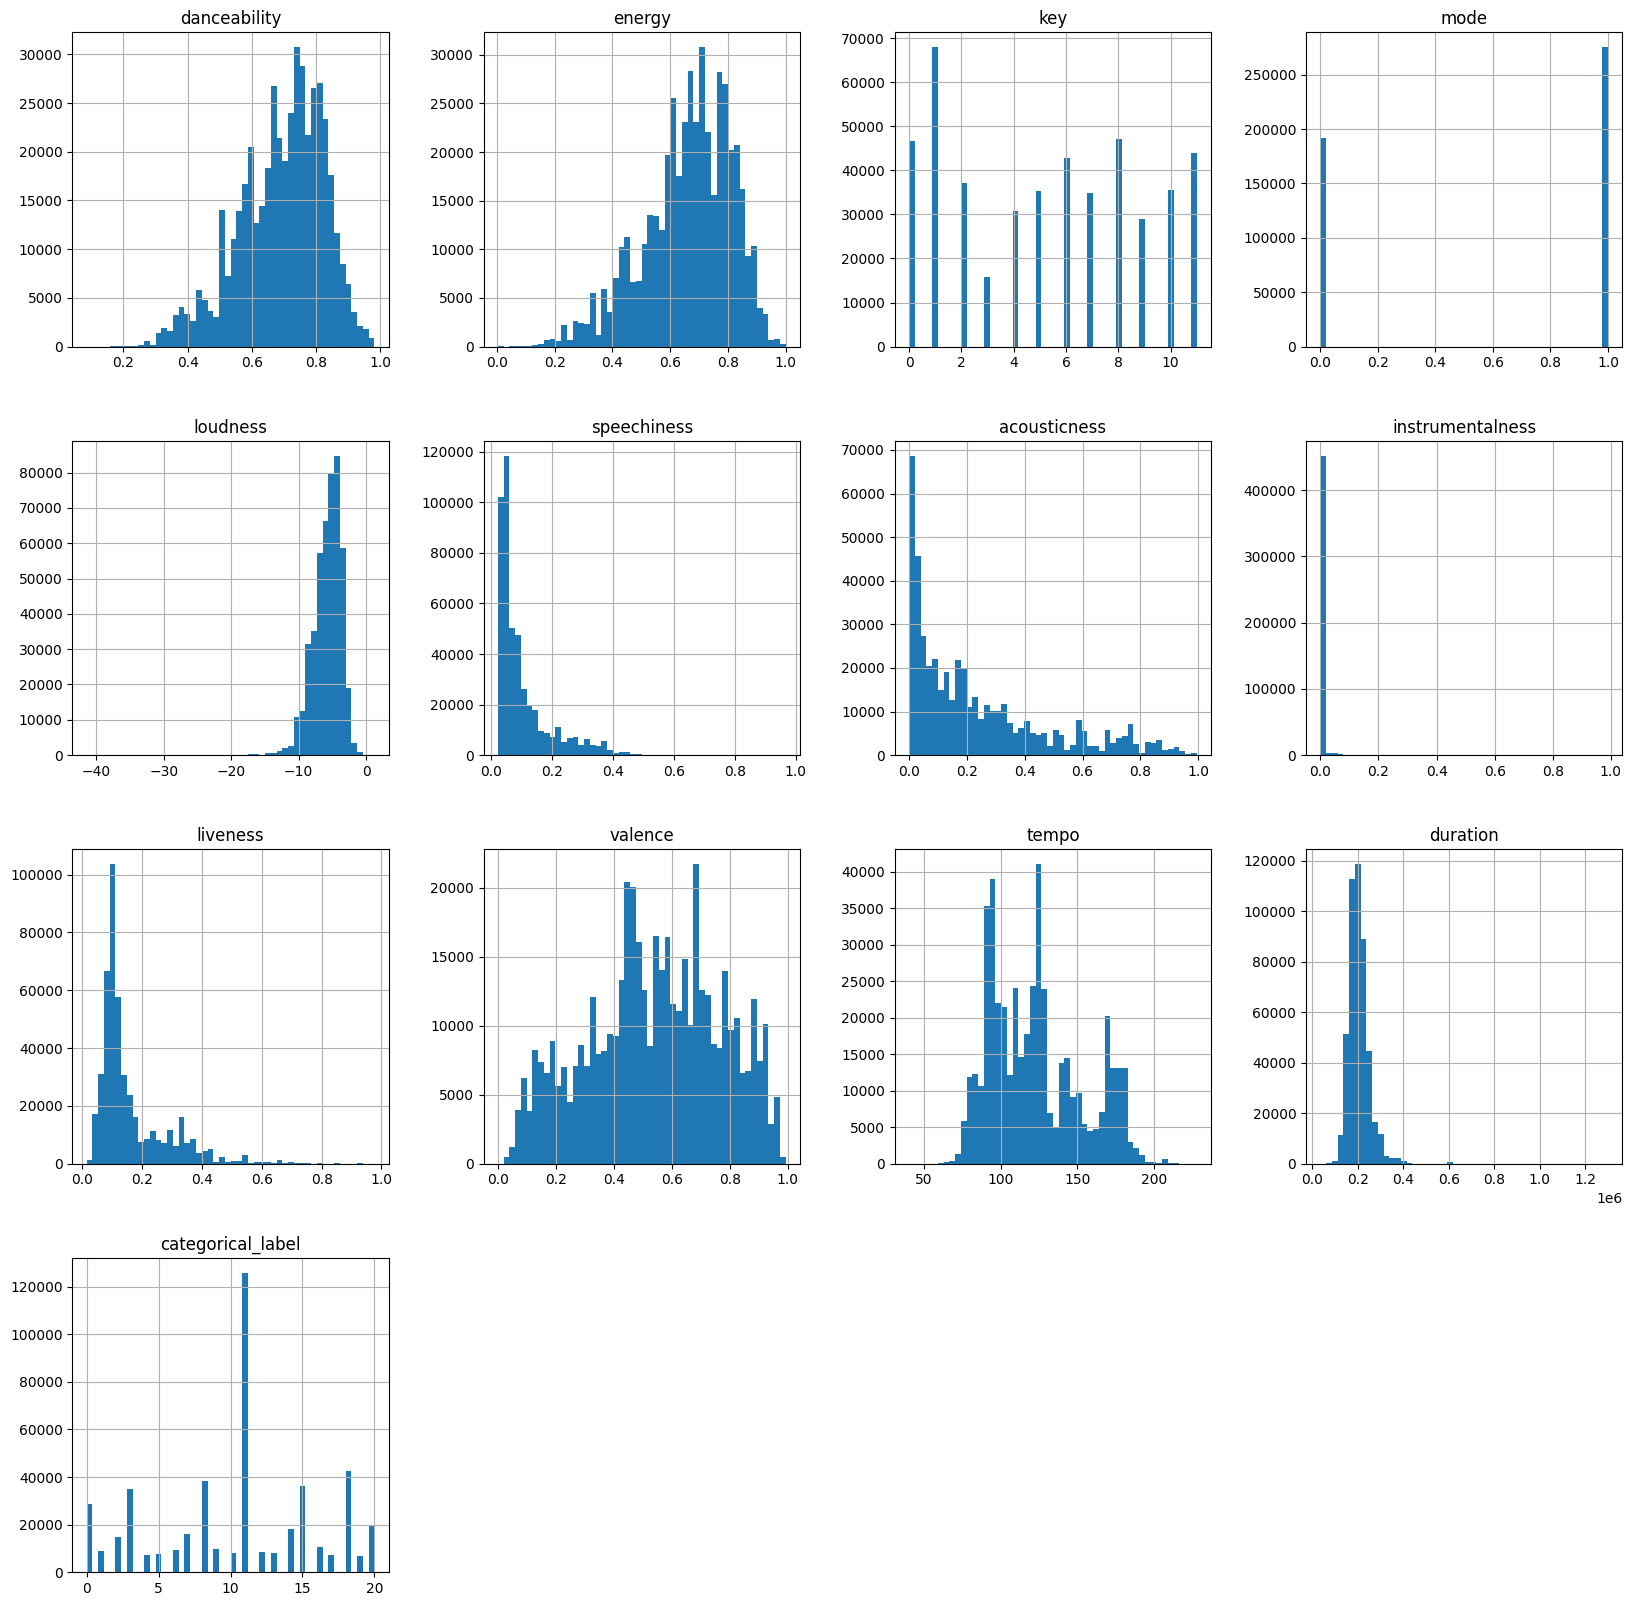

In [16]:
df[audio_cols+['categorical_label']].hist(bins=50, figsize=(20,20))
# ax.set_title("Hisogram plot", size=15, weight='bold')
plt.show()

In [17]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'median') # điền các gía trị thiếu bằng median
df[audio_cols] = imp.fit_transform(df[audio_cols])
df[audio_cols].isna().sum()

danceability        0
energy              0
key                 0
mode                0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
dtype: int64

In [18]:
new_df = df[audio_cols+['categorical_label']]
for i in new_df.columns:
  print(f'Skewness in {i} =',new_df[i].skew())

Skewness in danceability = -0.6068046312233515
Skewness in energy = -0.6735616959489055
Skewness in key = 0.03482130700412153
Skewness in mode = -0.36119121843682805
Skewness in loudness = -1.0587567219093992
Skewness in speechiness = 1.9011115067967355
Skewness in acousticness = 1.174511799842808
Skewness in instrumentalness = 12.047501548635804
Skewness in liveness = 1.953759484934972
Skewness in valence = -0.16398718274476112
Skewness in tempo = 0.5358313078545861
Skewness in duration = 1.798825173136104
Skewness in categorical_label = -0.18740941806756847


skew > 0 => Lệch bên phải ( đuôi bên phải ) - Positive Skewness và ngược lại với skew < 0<br>
https://www.sharkclass.vn/glossary/do-lech-%28skewness%29?lang=en

Các cột có high skew: 
- loudness
- speechiness
- acousticness
- instrucmentalness
- liveness
- duration

In [19]:
df['loudness_trans'] = np.cbrt(df['loudness'])
df['speechiness_trans'] = np.reciprocal(df['speechiness'])
df['acousticness_trans'] = np.cbrt(df['acousticness'])
df['instrumentalness_trans'] = np.log(df['instrumentalness'].apply(lambda x: x + 0.000001))
df['liveness_trans'] = np.cbrt(df['liveness'])
df['duration_trans'] = np.sqrt(df['duration'])
df['tempo_trans'] = np.cbrt(df['tempo'])

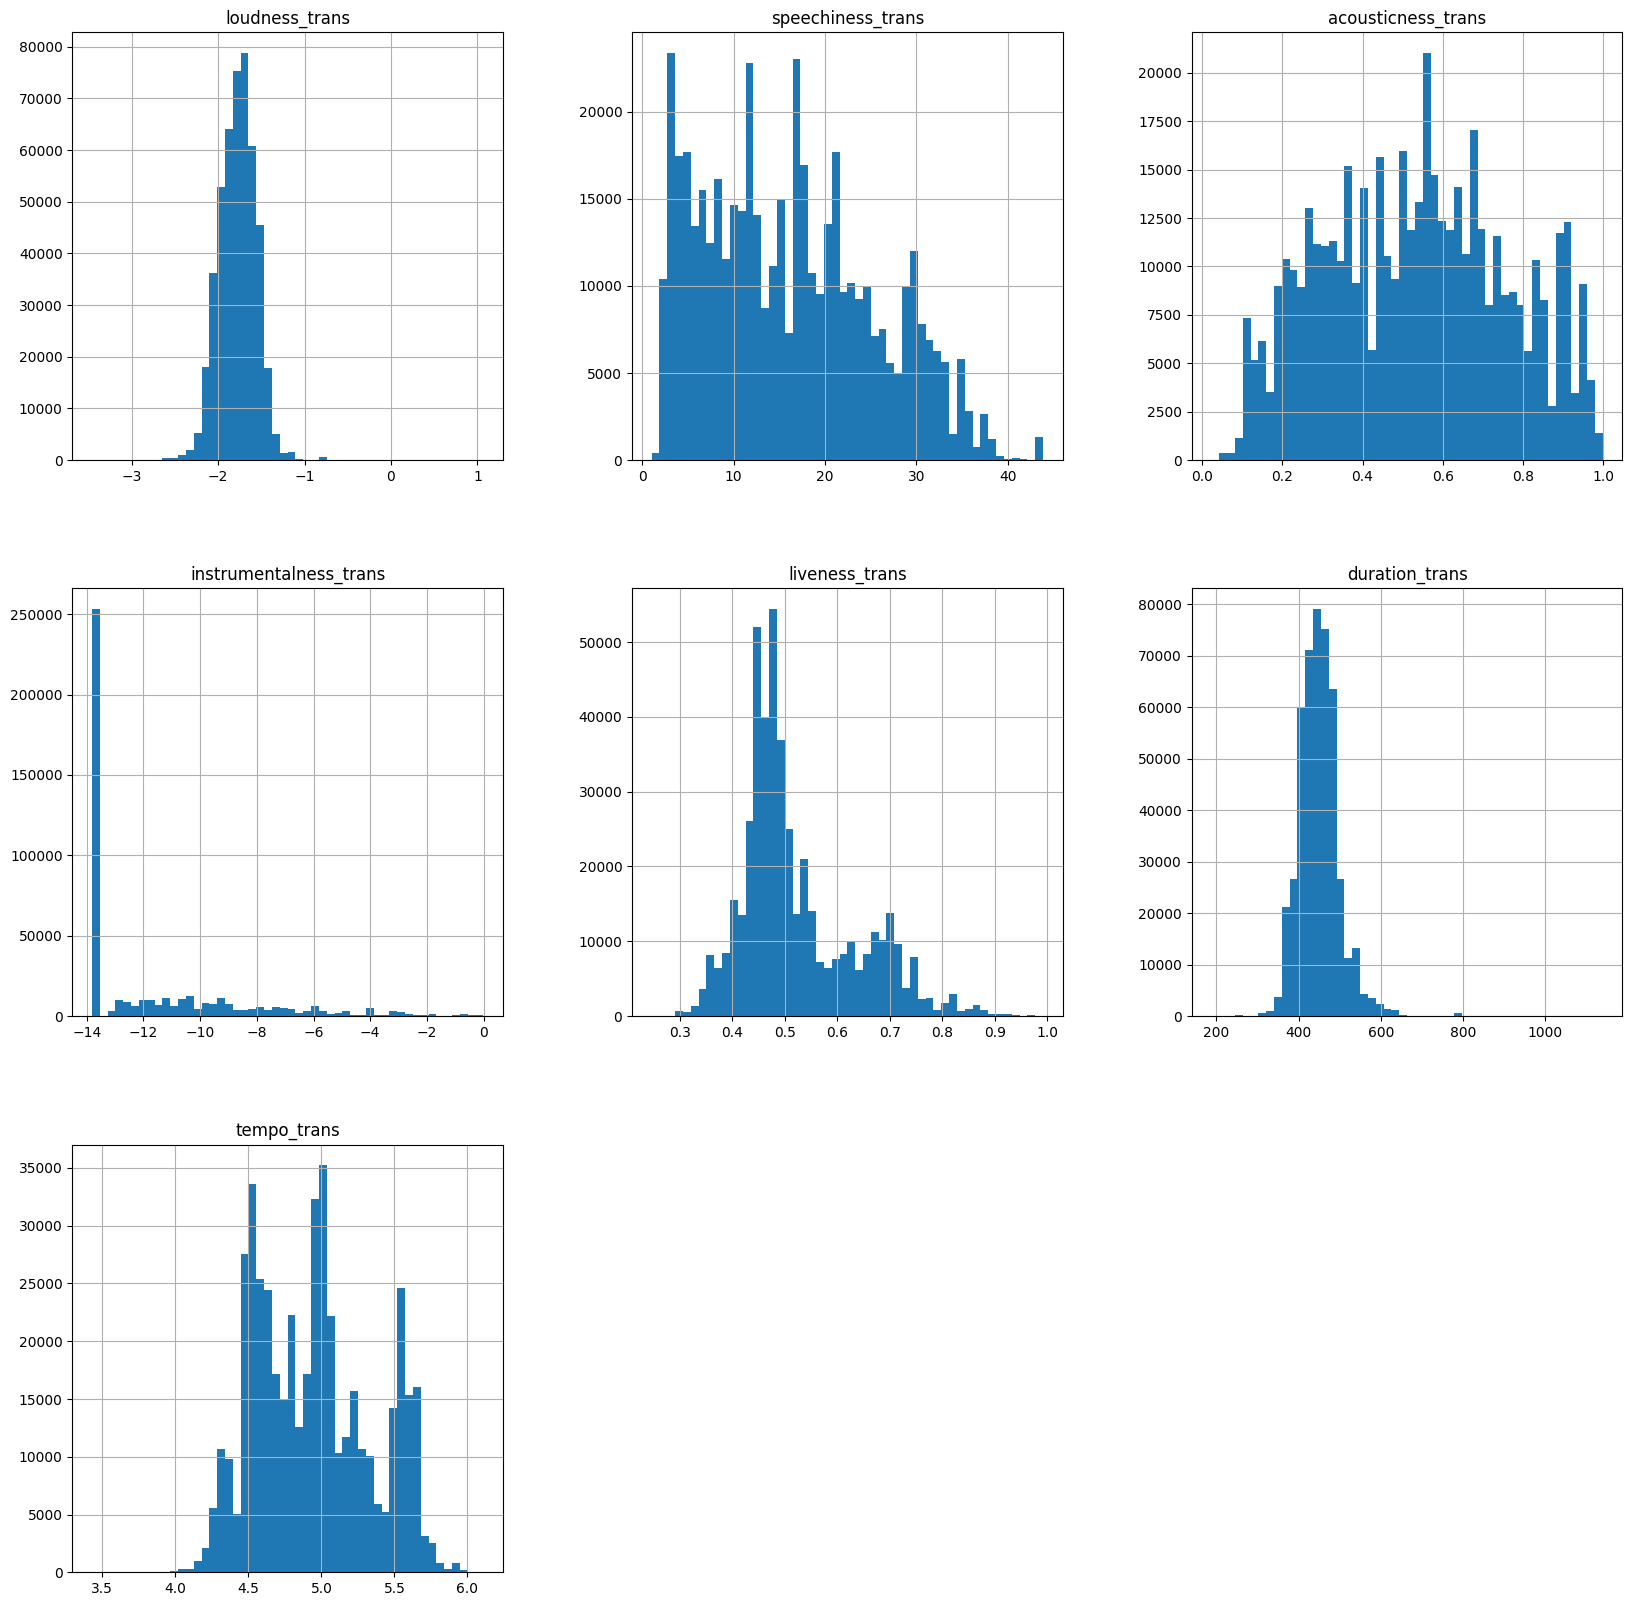

In [20]:
audio_trans  =['loudness_trans','speechiness_trans','acousticness_trans','instrumentalness_trans','liveness_trans','duration_trans','tempo_trans']
df[audio_trans].hist(bins=50, figsize=(20,20))
# ax.set_title("Hisogram plot", size=15, weight='bold')
plt.show()

In [21]:
df.shape

(467364, 42)

In [22]:
df.head()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,...,language,pivot,categorical_label,loudness_trans,speechiness_trans,acousticness_trans,instrumentalness_trans,liveness_trans,duration_trans,tempo_trans
5,spotify:track:4LRPiXqCikLlN15c3yImP7,11,Harry Styles,1,Harry Styles,spotify:artist:6KImCVD70vtIoJWnq6nGn3,pop,https://i.scdn.co/image/ab6761610000e5ebf7db7c...,As It Was,2022-03-31,...,Spanish,0,11,-1.747670,17.953321,0.699319,-6.896815,0.677517,409.026894,5.582021
11,spotify:track:1UdzJEpgJxtuXAlCOvD4S0,26,Danny Ocean,1,Danny Ocean,spotify:artist:5H1nN1SzW0qNeUEZvuXjAj,latin,https://i.scdn.co/image/ab6761610000e5eb5f8bb4...,Fuera del mercado,2022-02-17,...,Spanish,0,8,-1.780972,6.944444,0.683990,-13.815511,0.507875,399.811205,4.515339
17,spotify:track:6ylDpki1VpIsc525KC1ojF,39,Sebastian Yatra,1,Sebastian Yatra,spotify:artist:07YUOmWljBTXwIseAUd9TW,latin,https://i.scdn.co/image/ab6761610000e5eb28cc5e...,Tacones Rojos,2022-01-28,...,Spanish,0,8,-1.518150,27.855153,0.395789,-13.815511,0.530146,435.124120,4.973379
18,spotify:track:1fKFxmSByZfjwVSbq0PHye,40,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db0...,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,...,Spanish,0,0,-1.598305,20.491803,0.371569,-13.815511,0.624025,654.552519,4.347658
21,spotify:track:2JPLbjOn0wPCngEot2STUS,58,Bad Bunny,1,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,latin,https://i.scdn.co/image/ab6761610000e5eb8ee9a6...,Yonaguni,2021-06-04,...,Spanish,0,8,-1.663224,8.474576,0.651083,-13.815511,0.512993,454.653714,5.645704


In [23]:
df.drop(columns = ['duration','loudness','speechiness','acousticness','instrumentalness','liveness','tempo'], inplace = True)

## **Build model**

In [24]:
columns = ["artist_names","track_name"]
le = LabelEncoder()
for col in columns:
  df[col] = le.fit_transform(df[col])

In [25]:
X = df[['danceability', 'energy', 'key',
       'mode', 'valence', 
       'duration_trans','loudness_trans',
        'speechiness_trans','acousticness_trans','instrumentalness_trans','liveness_trans','tempo_trans']]
Y = df['categorical_label']

**Split train test**

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=11)

In [27]:
!pip install xgboost

**Standard Scaler**

In [28]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=21, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

[16:11:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

XG Boost accuracy is: 59.33%


In [29]:
Xgbclassifier.save_model('xgb_model.json')

In [30]:
Xgbclassifier.best_ntree_limit

1000

**Normalizer**

In [31]:
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

normalizer = Normalizer()
normalized_x_train = pd.DataFrame(normalizer.fit_transform(x_train), columns = x_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=14, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

[16:23:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

XG Boost accuracy is: 5.57%


**Logistic Regression and MinMaxScaler**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

LR = LogisticRegression(solver='newton-cg', multi_class = 'multinomial',random_state = 7).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = LR.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 33.44%


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver='liblinear').fit(normalized_x_train, y_train)
normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = LR.predict(normalized_x_test)

LRAcc = accuracy_score(y_pred,y_test) # Calculate accuracy
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 32.67%


**Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

RFclassifier = RandomForestClassifier(max_leaf_nodes = 30,random_state = 3).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = RFclassifier.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 37.71%


***

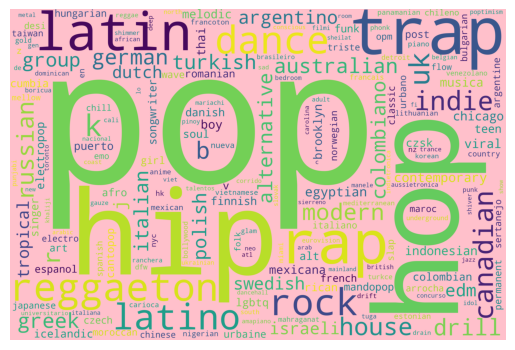

In [35]:
text = ', '.join(spotify_df['artist_genre'])
word_cloud = WordCloud(width=3000, 
                       height=2000, 
                       random_state=1, 
                       background_color='pink', 
                     #   colormap='Pastel1',
                       collocations=False,
                       stopwords=', ').generate(text)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [36]:
!git ls-tree -r --name-only --full-name modeling

.gitignore
EDA.ipynb
Final Project.ipynb
README.md
csv_file.txt
wordcloud-1.8.1-cp311-cp311-win_amd64.whl
xgb_model.json


In [37]:
from collections import Counter
def reduce_categories(col, threshold=0.85):
    threshold_value = int(threshold*len(col))
    reduced_cats = []
    s = 0
    counts = Counter(col)
    
    for i, j in counts.most_common():
        s+=dict(counts)[i]
        reduced_cats.append(i)
        if s>=threshold_value:
            break
    reduced_cats.append('Other')
    
    new_col=col.apply(lambda x: x if x in reduced_cats else 'Other')
    return new_col, reduced_cats

col, cate = reduce_categories(spotify_df['artist_genre'])
col.value_counts()

Other                166242
pop                  125702
trap latino           42656
latin                 38454
reggaeton             36275
                      ...  
korean pop              876
latin alternative       862
indie viet              857
slovak hip hop          844
portuguese pop          840
Name: artist_genre, Length: 221, dtype: int64

### **Trả lời câu hỏi 2**: Thời gian nào trong năm thì bài hát dễ 'lên hạng'?

In [38]:
spotify_df.sample(5)

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
890368,spotify:track:2dpaYNEQHiRxtZbfNsse99,173,"Marshmello, Bastille",2,Marshmello,spotify:artist:64KEffDW9EtZ1y2vBYgq8T,brostep,https://i.scdn.co/image/ab6761610000e5eba91af7...,Happier,2018-08-17,...,0.191,0.000000,0.167,0.671,100.015,214290.0,Singapore,Asia,English,0
484996,spotify:track:5jtgmZRPmm6QnJxegPoour,170,"Ingi Bauer, Séra Bjössi",2,Ingi Bauer,spotify:artist:4ynaUZA4BVF6d2XaNuflVz,icelandic pop,https://i.scdn.co/image/ab6761610000e5eb52b68b...,Dicks,2019-04-21,...,0.388,0.000002,0.122,0.331,125.950,155238.0,Iceland,Europe,Icelandic,0
652067,spotify:track:6hvczQ05jc1yGlp9zhb95V,124,BLACKPINK,1,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,k-pop,https://i.scdn.co/image/ab6761610000e5eb9f7319...,Kill This Love,2019-04-05,...,0.323,0.002210,0.225,0.645,131.875,191050.0,Malaysia,Asia,Malay,0
589942,spotify:track:5vGLcdRuSbUhD8ScwsGSdA,122,CJ,1,CJ,spotify:artist:7arQA31aZVS8yS6zUveWzb,nyc rap,https://i.scdn.co/image/ab6761610000e5ebc6e6cb...,Whoopty,2020-08-20,...,0.200,0.000000,0.127,0.660,140.201,123263.0,Korea,Asia,Korean,0
899843,spotify:track:6qj02zSeEJGWZ4c0dn5QzJ,29,Harry Styles,1,Harry Styles,spotify:artist:6KImCVD70vtIoJWnq6nGn3,pop,https://i.scdn.co/image/ab6761610000e5ebf7db7c...,Boyfriends,2022-05-20,...,0.935,0.000000,0.108,0.323,118.029,194544.0,Slovakia,Europe,Slovak,0


In [39]:
standard_prev_rank = spotify_df['previous_rank'].apply(lambda x: 200 if x == -1 else x)
spotify_df['rank_up'] = standard_prev_rank - spotify_df['rank']

In [40]:
spotify_df[spotify_df['country']=='Vietnam'][spotify_df['rank']==1]#.value_counts()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8540\3235955672.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spotify_df[spotify_df['country']=='Vietnam'][spotify_df['rank']==1]#.value_counts()


,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,...,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot,rank_up
1094320,spotify:track:186NCtNk1tUYS7c2DxgJ7O,1,V,1,V,spotify:artist:3JsHnjpbhX4SnySpvpa9DK,korean ost,https://i.scdn.co/image/ab6761610000e5ebfe5cec...,Christmas Tree,2021-12-24,...,0.000023,0.1210,0.181,139.009,209947.0,Vietnam,Asia,Vietnamese,0,199
1094429,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,1,Adele,1,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,pop,https://i.scdn.co/image/ab6761610000e5eb68f6e5...,Easy On Me,2021-10-14,...,0.000000,0.1330,0.130,141.981,224695.0,Vietnam,Asia,Vietnamese,0,199
1094551,spotify:track:7uQZVznj0uQOGC9KhV2Mg6,1,LISA,1,LISA,spotify:artist:5L1lO4eRHmJ7a0Q6csE5cT,k-pop,https://i.scdn.co/image/ab6761610000e5eb7315c4...,LALISA,2021-09-10,...,0.000784,0.1070,0.850,150.058,200690.0,Vietnam,Asia,Vietnamese,0,199
1094925,spotify:track:7CAdT0HdiQNlt1C7xk2hep,1,Jung Kook,1,Jung Kook,spotify:artist:6HaGTQPmzraVmaVxvz6EUc,0,https://i.scdn.co/image/ab6761610000e5eb219729...,Stay Alive (Prod. SUGA of BTS),2022-02-11,...,0.000000,0.1030,0.495,130.096,210928.0,Vietnam,Asia,Vietnamese,0,199
1095158,spotify:track:5fFLotKS1286huYIMQHqz7,1,Sơn Tùng M-TP,1,Sơn Tùng M-TP,spotify:artist:5dfZ5uSmzR7VQK0udbAVpf,vietnamese melodic rap,https://i.scdn.co/image/ab6761610000e5eb103655...,Muộn Rồi Mà Sao Còn,2021-04-29,...,0.000000,0.1110,0.531,127.073,275906.0,Vietnam,Asia,Vietnamese,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108639,spotify:track:3FeVmId7tL5YN8B7R3imoM,1,"Coldplay, BTS",2,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,pop,https://i.scdn.co/image/ab6761610000e5eb865a33...,My Universe,2021-09-24,...,0.000000,0.2000,0.443,104.988,228000.0,Vietnam,Asia,Vietnamese,0,0
1108806,spotify:track:7DF8lvLdV3htIbuTWpc7lR,1,"Juice WRLD, SUGA, BTS",3,Juice WRLD,spotify:artist:4MCBfE4596Uoi2O4DtmEMz,chicago rap,https://i.scdn.co/image/ab6761610000e5eb1908e1...,Girl Of My Dreams (with SUGA of BTS),2021-12-10,...,0.000000,0.1300,0.332,139.988,226149.0,Vietnam,Asia,Vietnamese,0,199
1109050,spotify:track:3FeVmId7tL5YN8B7R3imoM,1,"Coldplay, BTS",2,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,pop,https://i.scdn.co/image/ab6761610000e5eb865a33...,My Universe,2021-09-24,...,0.000000,0.2000,0.443,104.988,228000.0,Vietnam,Asia,Vietnamese,0,199
1109125,spotify:track:0mBP9X2gPCuapvpZ7TGDk3,1,"Charlie Puth, BTS, Jung Kook",3,Charlie Puth,spotify:artist:6VuMaDnrHyPL1p4EHjYLi7,dance pop,https://i.scdn.co/image/ab6761610000e5eb0d890f...,Left and Right (Feat. Jung Kook of BTS),2022-06-24,...,0.000013,0.0901,0.719,101.058,154487.0,Vietnam,Asia,Vietnamese,0,1


In [41]:
trending = spotify_df[spotify_df['country']=='Vietnam'][spotify_df['rank_up']==spotify_df['rank_up'].max()]
trending

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8540\4125805770.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trending = spotify_df[spotify_df['country']=='Vietnam'][spotify_df['rank_up']==spotify_df['rank_up'].max()]


,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,...,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot,rank_up
1094320,spotify:track:186NCtNk1tUYS7c2DxgJ7O,1,V,1,V,spotify:artist:3JsHnjpbhX4SnySpvpa9DK,korean ost,https://i.scdn.co/image/ab6761610000e5ebfe5cec...,Christmas Tree,2021-12-24,...,0.000023,0.1210,0.181,139.009,209947.0,Vietnam,Asia,Vietnamese,0,199
1094429,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,1,Adele,1,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,pop,https://i.scdn.co/image/ab6761610000e5eb68f6e5...,Easy On Me,2021-10-14,...,0.000000,0.1330,0.130,141.981,224695.0,Vietnam,Asia,Vietnamese,0,199
1094551,spotify:track:7uQZVznj0uQOGC9KhV2Mg6,1,LISA,1,LISA,spotify:artist:5L1lO4eRHmJ7a0Q6csE5cT,k-pop,https://i.scdn.co/image/ab6761610000e5eb7315c4...,LALISA,2021-09-10,...,0.000784,0.1070,0.850,150.058,200690.0,Vietnam,Asia,Vietnamese,0,199
1094925,spotify:track:7CAdT0HdiQNlt1C7xk2hep,1,Jung Kook,1,Jung Kook,spotify:artist:6HaGTQPmzraVmaVxvz6EUc,0,https://i.scdn.co/image/ab6761610000e5eb219729...,Stay Alive (Prod. SUGA of BTS),2022-02-11,...,0.000000,0.1030,0.495,130.096,210928.0,Vietnam,Asia,Vietnamese,0,199
1095648,spotify:track:2jk6oBuLiCZJTDWhlJEzIw,1,j-hope,1,j-hope,spotify:artist:0b1sIQumIAsNbqAoIClSpy,k-rap,https://i.scdn.co/image/ab6761610000e5ebfa980b...,Airplane,2018-03-02,...,0.000000,0.1090,0.238,119.992,197914.0,Vietnam,Asia,Vietnamese,0,199
1096139,spotify:track:0LThjFY2iTtNdd4wviwVV2,1,BTS,1,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,k-pop,https://i.scdn.co/image/ab6761610000e5eb5704a6...,Permission to Dance,2021-07-09,...,0.000000,0.3370,0.646,124.925,187585.0,Vietnam,Asia,Vietnamese,0,199
1098505,spotify:track:10SRMwb9EuVS1K9rYsBfHQ,1,BTS,1,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,k-pop boy group,https://i.scdn.co/image/ab6761610000e5eb5704a6...,Yet To Come,2022-06-10,...,0.000000,0.3330,0.683,172.029,193594.0,Vietnam,Asia,Vietnamese,0,199
1098964,spotify:track:1Y7AZ3akqDipAyo6mmOQTy,1,Agust D,1,Agust D,spotify:artist:5RmQ8k4l3HZ8JoPb4mNsML,k-rap,https://i.scdn.co/image/ab6761610000e5ebe94c52...,Daechwita,2020-05-22,...,0.000000,0.1210,0.223,144.995,225668.0,Vietnam,Asia,Vietnamese,0,199
1100324,spotify:track:2pn8dNVSpYnAtlKFC8Q0DJ,1,ROSÉ,1,ROSÉ,spotify:artist:3eVa5w3URK5duf6eyVDbu9,k-pop,https://i.scdn.co/image/ab6761610000e5eba23b22...,On The Ground,2021-03-12,...,0.000000,0.1310,0.286,188.700,168086.0,Vietnam,Asia,Vietnamese,0,199
1100569,spotify:track:6GJi4nSZOiTOU2FhsgxWyH,1,Vũ.,1,Vũ.,spotify:artist:57g2v7gJZepcwsuwssIfZs,rock viet,https://i.scdn.co/image/ab6761610000e5ebec1bd4...,Bước Qua Nhau,2021-11-11,...,0.000109,0.1860,0.215,135.757,257647.0,Vietnam,Asia,Vietnamese,0,199


In [42]:
x = spotify_df[spotify_df['country']=='Vietnam'].groupby(spotify_df['week'].dt.month)['rank_up'].value_counts()
display(x)

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
pd.DataFrame(x.to_frame().rename(columns={'rank_up': 'counts'}).reset_index().sort_values(by=['rank_up']))

,week,rank_up,counts
566,4,-166,1
1791,12,-151,1
402,3,-140,1
1792,12,-136,1
955,6,-133,1
...,...,...,...
826,5,199,1
1790,12,199,2
954,6,199,2
1707,11,199,1


Check một bài hát đã ở trong top tuần này có ở trong top tuần khác không?

In [ ]:
spotify_df[spotify_df['country'] == 'Global']

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot,rank_up
338782,spotify:track:6MWtB6iiXyIwun0YzU6DFP,2,Post Malone,1,Post Malone,spotify:artist:246dkjvS1zLTtiykXe5h60,rap,https://i.scdn.co/image/ab6761610000e5ebb894ef9fa437b0389c5567cc,Wow.,2018-12-24,1.0,https://i.scdn.co/image/ab67616d0000b27379eb2363cc79781b03d80b2e,Republic Records,2,3,4,29944242,2019-01-17,0.833,0.539,11.0,0.0,-7.399,0.1780,0.1630,0.000002,0.1010,0.385,99.947,149520.0,Global,Global,Global,0,1
338783,spotify:track:2rPE9A1vEgShuZxxzR2tZH,3,Ariana Grande,1,Ariana Grande,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,pop,https://i.scdn.co/image/ab6761610000e5ebcdce7620dc940db079bf4952,"thank u, next",2018-11-03,1.0,https://i.scdn.co/image/ab67616d0000b273ffa275ba245edba4c1c720af,Republic Records,1,2,11,27807232,2019-01-17,0.724,0.647,1.0,1.0,-5.642,0.0658,0.2800,0.000000,0.1020,0.435,106.960,207333.0,Global,Global,Global,0,-1
338784,spotify:track:5p7ujcrUXASCNwRaWNHR1C,4,Halsey,1,Halsey,spotify:artist:26VFTg2z8YR0cCuwLzESi2,electropop,https://i.scdn.co/image/ab6761610000e5ebd707e1c5177614c4ec95a06c,Without Me,2018-10-04,1.0,https://i.scdn.co/image/ab67616d0000b273c42acc1b86597285c2c79559,Capitol Records,4,4,15,27138512,2019-01-17,0.752,0.488,6.0,1.0,-7.050,0.0705,0.2970,0.000009,0.0936,0.533,136.041,201661.0,Global,Global,Global,0,0
338785,spotify:track:25sgk305KZfyuqVBQIahim,6,Ava Max,1,Ava Max,spotify:artist:4npEfmQ6YuiwW1GpUmaq3F,pop,https://i.scdn.co/image/ab6761610000e5eb27a772a3d3f62f6fc990ce0f,Sweet but Psycho,2018-08-17,1.0,https://i.scdn.co/image/ab67616d0000b273c5015d2a9270865a5979f56b,Atlantic Records,6,6,16,22400542,2019-01-17,0.719,0.704,1.0,1.0,-4.724,0.0476,0.0691,0.000000,0.1660,0.628,133.002,187436.0,Global,Global,Global,0,0
338786,spotify:track:1rqqCSm0Qe4I9rUvWncaom,9,Panic! At The Disco,1,Panic! At The Disco,spotify:artist:20JZFwl6HVl6yg8a4H3ZqK,modern rock,https://i.scdn.co/image/ab6761610000e5ebb256ae9a4b82bfff97776ae2,High Hopes,2018-06-22,11.0,https://i.scdn.co/image/ab67616d0000b273c5148520a59be191eea16989,DCD2 / Fueled By Ramen,9,11,30,19643546,2019-01-17,0.579,0.904,5.0,1.0,-2.729,0.0618,0.1930,0.000000,0.0640,0.681,82.014,190947.0,Global,Global,Global,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,spotify:track:6WkJ2OK163XXS2oARUC9JM,188,"Aaron Smith, Krono, Luvli",3,Aaron Smith,spotify:artist:77qukKzmdI5BeMBR7WGUrN,chicago house,https://i.scdn.co/image/ab6761610000e5eb4e3b9e4559d3cff50dcc69cf,Dancin (feat. Luvli) - Krono Remix,2014-11-07,1.0,https://i.scdn.co/image/ab67616d0000b273f7a3a5656060030a0d24855c,Sony Music Entertainment,101,167,15,4606395,2019-06-13,0.720,0.741,10.0,0.0,-6.529,0.0287,0.1010,0.000014,0.2890,0.357,119.896,198053.0,Global,Global,Global,0,-21
396771,spotify:track:2kkcJ8tSDV42LdWcPjy6We,194,"Samra, Capital Bra",2,Samra,spotify:artist:6h1s4i4XKIYv4ErDelLDN0,german hip hop,https://i.scdn.co/image/ab6761610000e5eb434a7526f8a622e4b3c3bb79,Wieder Lila,2019-05-17,1.0,https://i.scdn.co/image/ab67616d0000b273beb0cccc098b713f30c4ed43,Urban,47,132,4,4547192,2019-06-13,0.656,0.756,2.0,0.0,-4.026,0.3000,0.4350,0.000000,0.0934,0.645,168.031,188057.0,Global,Global,Global,0,-62
396772,spotify:track:2tOOcDDYkh0PSjr6GwPEAJ,196,"MAX, Quinn XCII",2,MAX,spotify:artist:1bqxdqvUtPWZri43cKHac8,electropop,https://i.scdn.co/image/ab6761610000e5eb09ce0644c08fa03347ef8928,Love Me Less (feat. Quinn XCII),2019-04-05,1.0,https://i.scdn.co/image/ab67616d0000b273038e01a9fbf375dcccea5a3c,Colour Vision Records/Sony Music Entertainment,135,168,4,4538692,2019-06-13,0.732,0.856,11.0,0.0,-2.200,0.0929,0.0828,0.000000,0.3230,0.771,145.034,177670.0,Global,Global,Gl

In [ ]:
spotify_df.groupby('week')['track_name'].value_counts().to_frame()

track_name
week       track_name                                          
2016-12-29 All I Want for Christmas Is You                    2
           24K Magic                                          1
           7 Years                                            1
           A Holly Jolly Christmas - Single Version           1
           Ain't My Fault                                     1
...                                                         ...
2022-07-14 高嶺の花子さん                                            1
           鯨落                                                 1
           黑暗的盡頭                                              1
           니가 왜 거기서 나와 (Narr. 고은아)                            1
           스물다섯, 스물하나                                         1

[452810 rows x 1 columns]

---

### **Câu hỏi 3**: Ca khúc nào có được nhiều sự yêu thích ở các Quốc gia ?

Ca khúc được yêu thích dựa trên các yếu tố như: <br>
+ Được lên top 10 Quốc gia.
+ Có được thời gian trong top lâu nhất liên tục qua các quá trình cập nhật.

Đầu tiên xét ở một quốc gia nhỏ như Việt Nam trước khi đến toàn bộ Quốc gia của dataset đề cập.

Kiểm tra lại các cột trước khi tiến hành trả lời câu hỏi.

In [ ]:
spotify_df.columns

Index(['uri', 'rank', 'artist_names', 'artists_num', 'artist_individual',
       'artist_id', 'artist_genre', 'artist_img', 'track_name', 'release_date',
       'album_num_tracks', 'album_cover', 'source', 'peak_rank',
       'previous_rank', 'weeks_on_chart', 'streams', 'week', 'danceability',
       'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration',
       'country', 'region', 'language', 'pivot', 'rank_up'],
      dtype='object')

In [ ]:
cols = ["uri", "artist_names", "track_name", "week", "streams", "country"]
spotify_df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109520 entries, 0 to 1109519
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   uri           1109520 non-null  object        
 1   artist_names  1109520 non-null  object        
 2   track_name    1109520 non-null  object        
 3   week          1109520 non-null  datetime64[ns]
 4   streams       1109520 non-null  int32         
 5   country       1109520 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 46.6+ MB


Không có dòng thiếu. Tiến hành trả lời câu hỏi.


**Bước 1**: Chọn các bài hát thuộc Quốc gia Việt Nam

In [ ]:
def song_in_country(country):
    return spotify_df[spotify_df.country == country]

In [ ]:
song_in_vietnam_df = song_in_country("Vietnam")

**Bước 2**: Chọn các bài hát được đưa lên top 1 Việt Nam

In [ ]:
def song_in_top_10(df):
    return df[df["rank"] <= 10]

In [ ]:
top10_df = song_in_top_10(song_in_vietnam_df)

**Bước 3**: Tạo một mảng đánh dấu lại các ngày được lên top10

In [ ]:
group_weeks = top10_df.groupby("uri")["week"].apply(lambda grp: list(set(grp))).reset_index()

In [ ]:
weeks = sorted(top10_df.week.unique())

In [ ]:
def check_week_series(aWeeks):
    aDates = np.zeros(len(weeks))
    lIndex = [weeks.index(week) for week in aWeeks] # get index from "weeks"
    aDates[lIndex] = 1
    return aDates

In [ ]:
# group_weeks["check_date"] = group_weeks.apply(lambda x: check_date_series(x.week), axis =1)
group_weeks["check_week"] = group_weeks.week.apply(check_week_series)

**Bước 4**: Tính tổng số ngày lên top10 liên tục

In [ ]:
def num_week_on_top_continuously(aCheckWeek):
    lCheckWeek = aCheckWeek.tolist()
    if 0 in lCheckWeek:
        idx1 = lCheckWeek.index(1)
        lFromIndex = lCheckWeek[idx1:]
        if 0 in lFromIndex:
            idx0 = lFromIndex.index(0)
            num_week_on_top = sum(lFromIndex[:idx0])
        else:
            num_week_on_top = len(lFromIndex)
    else:
        num_week_on_top = len(lCheckWeek)
    return num_week_on_top

In [ ]:
group_weeks["num_week_on_top_continuously"] = group_weeks.check_week.apply(num_week_on_top_continuously)

In [ ]:
top_uri = group_weeks.loc[group_weeks.num_week_on_top_continuously == group_weeks.num_week_on_top_continuously.max()]["uri"].values[0]

In [ ]:
favorite_song_df = top10_df[top10_df.uri == top_uri]
#favorite_song_df

Áp dụng cho lại thử cho một Quốc Gia bất kỳ

In [ ]:
# spotify_df.country.unique().tolist()

In [ ]:
def favorite_song_in_country(country):
    song_in_country_df = song_in_country(country)
    top10_df = song_in_top_10(song_in_country_df)
    group_weeks = top10_df.groupby("uri")["week"].apply(lambda grp: list(set(grp))).reset_index()
    weeks = sorted(top10_df.week.unique())
    group_weeks["check_week"] = group_weeks.week.apply(check_week_series)
    group_weeks["num_week_on_top_continuously"] = group_weeks.check_week.apply(num_week_on_top_continuously)
    top_uri = group_weeks.loc[group_weeks.num_week_on_top_continuously == group_weeks.num_week_on_top_continuously.max()]["uri"].values[0]
    favorite_song_df = top10_df[top10_df.uri == top_uri]
    return favorite_song_df

In [ ]:
# favorite_song_in_country("Argentina")

---

### **Câu 4**: Ca sĩ thuộc nhiều bài top hit nhất ở một Quốc Gia trong mùa hè năm 2022?

Ca sĩ thuộc nhiều bài top hit: <br>
+ Là ca sĩ hát nhiều bài trong top nhất. <br>

Mùa hè năm 2022:<br>
+ Những tuần thuộc tháng 4 5 6.

In [ ]:
spotify_df.columns

Index(['uri', 'rank', 'artist_names', 'artists_num', 'artist_individual',
       'artist_id', 'artist_genre', 'artist_img', 'track_name', 'release_date',
       'album_num_tracks', 'album_cover', 'source', 'peak_rank',
       'previous_rank', 'weeks_on_chart', 'streams', 'week', 'danceability',
       'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration',
       'country', 'region', 'language', 'pivot', 'rank_up'],
      dtype='object')

In [ ]:
cols_work = ["uri", "artist_names", "rank", "week", "country"]
df = spotify_df[cols_work]

**Bước 1**: Lọc những bài hát thuộc mùa hè năm 2022

In [ ]:
summer_song_df = df.loc[(df["week"].dt.month > 3) & (df["week"].dt.month < 7) & (df["week"].dt.year == 2022)]
# summer_song_df

**Bước 2**: Tách cột tên thành từng dòng các nghệ sĩ của bài hát:

In [ ]:
summer_song_df.artist_names

0                        Paulo Londra
1                                 WOS
2                        Paulo Londra
3                             Cris Mj
4                              Emilia
                      ...            
1109515    Charlie Puth, Selena Gomez
1109516                     Binz, Đen
1109517               Kai Đinh, SIVAN
1109518         Maroon 5, Wiz Khalifa
1109519    Elton John, Dua Lipa, PNAU
Name: artist_names, Length: 191396, dtype: object

In [ ]:
summer_song_df["artist_names"]= summer_song_df.artist_names.apply(lambda x: x.split(", "))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10816\661847478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_song_df["artist_names"]= summer_song_df.artist_names.apply(lambda x: x.split(", "))


In [ ]:
summer_song_df

,uri,artist_names,rank,week,country
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,[Paulo Londra],1,2022-04-14,Argentina
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,[WOS],2,2022-04-14,Argentina
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,[Paulo Londra],3,2022-04-14,Argentina
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,[Cris Mj],5,2022-04-14,Argentina
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,[Emilia],6,2022-04-14,Argentina
...,...,...,...,...,...
1109515,spotify:track:68EMU2RD1ECNeOeJ5qAXCV,"[Charlie Puth, Selena Gomez]",190,2022-05-05,Vietnam
1109516,spotify:track:51bYFYWODfYOZU0rwvjiCc,"[Binz, Đen]",195,2022-05-05,Vietnam
1109517,spotify:track:0vLXpeE2Z7iVvcba8PAwwI,"[Kai Đinh, SIVAN]",196,2022-05-05,Vietnam
1109518,spotify:track:1XGmzt0PVuFgQYYnV2It7A,"[Maroon 5, Wiz Khalifa]",197,2022-05-05,Vietnam


Dùng hàm pd.DataFrame.explode để khai triển các tên trong list thành 1 row khác

In [ ]:
summer_song_df = summer_song_df.explode("artist_names")

**Bước 3**: Tính số lượng bài hát mà ca sĩ đó tham gia.

In [ ]:
count_singer_in_summer_df = summer_song_df.groupby("country")["artist_names"].value_counts().to_frame().rename(columns = {"artist_names": "count"}).reset_index()
count_singer_in_summer_df

,country,artist_names,count
0,Argentina,Bad Bunny,290
1,Argentina,Maria Becerra,196
2,Argentina,Duki,182
3,Argentina,Tiago PZK,132
4,Argentina,Rauw Alejandro,117
...,...,...,...
21889,Vietnam,Thanh Lam,1
21890,Vietnam,Tùng Dương,1
21891,Vietnam,Wiz Khalifa,1
21892,Vietnam,Wonstein,1


**Bước 4**: Tìm index có giá trị bằng với giá trị lớn nhất của mỗi group `country`<br>
+ Tạo biến `idx` để chứa 1 Series `bool` tìm các vị trí trùng với vị trí `count` lớn nhất của mỗi group `country`

In [ ]:
idx = count_singer_in_summer_df.groupby("country")["count"].transform("max") == count_singer_in_summer_df["count"]

In [ ]:
favorite_artist_in_summer_df = count_singer_in_summer_df[idx].set_index("country")

In [ ]:
favorite_artist_in_summer_df

,artist_names,count
country,,
Argentina,Bad Bunny,290
Australia,Harry Styles,127
Austria,CRO,117
Belarus,OG Buda,117
Belgium,Harry Styles,73
...,...,...
United Kingdom,Harry Styles,143
United States,Bad Bunny,203
Uruguay,Bad Bunny,266


Kiểm tra lại kết quả cho chắc

In [ ]:
summer_song_df[(summer_song_df.country == "Argentina") & (summer_song_df.artist_names == "Bad Bunny")]

,uri,artist_names,rank,week,country
21,spotify:track:2JPLbjOn0wPCngEot2STUS,Bad Bunny,58,2022-04-14,Argentina
24,spotify:track:4r9jkMEnArtWGH2rL2FZl0,Bad Bunny,66,2022-04-14,Argentina
60,spotify:track:35wvL50xvKpCHEJPxLOLPI,Bad Bunny,149,2022-04-14,Argentina
111,spotify:track:2JPLbjOn0wPCngEot2STUS,Bad Bunny,56,2022-04-28,Argentina
115,spotify:track:4r9jkMEnArtWGH2rL2FZl0,Bad Bunny,71,2022-04-28,Argentina
...,...,...,...,...,...
14487,spotify:track:4gzsuuZypVbxs0Af1LSZyB,Bad Bunny,101,2022-06-09,Argentina
14492,spotify:track:44XjoNvtwevktFKjvVe1vH,Bad Bunny,111,2022-06-09,Argentina
14504,spotify:track:71wFwRo8xGc4lrcyKwsvba,Bad Bunny,135,2022-06-09,Argentina
14508,spotify:track:0E0DRHf5PfMeor0ZCwB3oT,Bad Bunny,139,2022-06-09,Argentina
